# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow
!pip install opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 420.6/420.6 kB 6.5 MB/s eta 0:00:00
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached grpcio-1.53.0-cp311-cp311-win_amd64.whl (3.9 MB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\pyrsa-decrypt.exe' -> 'C:\\Python311\\Scripts\\pyrsa-decrypt.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- --------
flatbuffers                  23.3.3
fonttools                    4.39.3
kiwisolver                   1.4.4
libclang                     16.0.0
numpy                        1.24.2
opencv-python                4.7.0.72
packaging                    23.0
Pillow                       9.5.0
pip                          22.3.1
pyasn1                       0.4.8
pygame                       2.3.0
pyparsing                    3.0.9
python-dateutil              2.8.2
pywin32                      306
rsa                          4.9
Send2Trash                   1.8.0
setuptools                   65.5.0
six                          1.16.0
tensorboard-data-server      0.7.0
tensorboard-plugin-wit       1.8.1
tensorflow-estimator         2.12.0
tensorflow-io-gcs-filesystem 0.31.0
termcolor                    2.2.0
typing_extensions            4.5.0
urllib3                      1.26.15
wcwidth                      0.2.6
webenc


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')#limitting the ram usage
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr# for checking extensions

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
#os.listdir(data_dir)
#os.listdir(os.path.join(data_dir,'happy'))

In [10]:
img=cv2.imread(os.path.join('data','happy','1-2.jpg'))#returns numpy array

In [11]:
img.shape#350*590 pixels and 3 means colour

(350, 590, 3)

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)#if the image is compatible with opencv
            tip = imghdr.what(image_path)#if any image has any wierd extensions
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)#removing those images
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')#created a pipeline of data set using keras......tf dataset is an api

Found 305 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()# allows us to access the pipeline ie looping through dataset

In [16]:
batch = data_iterator.next()#accessing the pipeline

In [17]:
batch #contains all the data of the images(batch[0]) and labels(happy or sad)(batch[1]) of every image

(array([[[[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84554688e+02, 1.84554688e+02, 1.84554688e+02],
          [1.80628906e+02, 1.80628906e+02, 1.80628906e+02],
          ...,
          [1.79484375e+02, 1.79484375e+02, 1.79484375e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02]],
 
         [[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84554688e+02, 1.84554688e+02, 1.84554688e+02],
          [1.80735092e+02, 1.80735092e+02, 1.80735092e+02],
          ...,
          [1.79272003e+02, 1.79272003e+02, 1.79272003e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02],
          [1.78000000e+02, 1.78000000e+02, 1.78000000e+02]],
 
         [[1.87888672e+02, 1.87888672e+02, 1.87888672e+02],
          [1.84586655e+02, 1.84586655e+02, 1.84586655e+02],
          [1.81101562e+02, 1.81101562e+02, 1.81101562e+02],
          ...,
          [1.81291840e+02, 1.81291840e+02, 1.8129

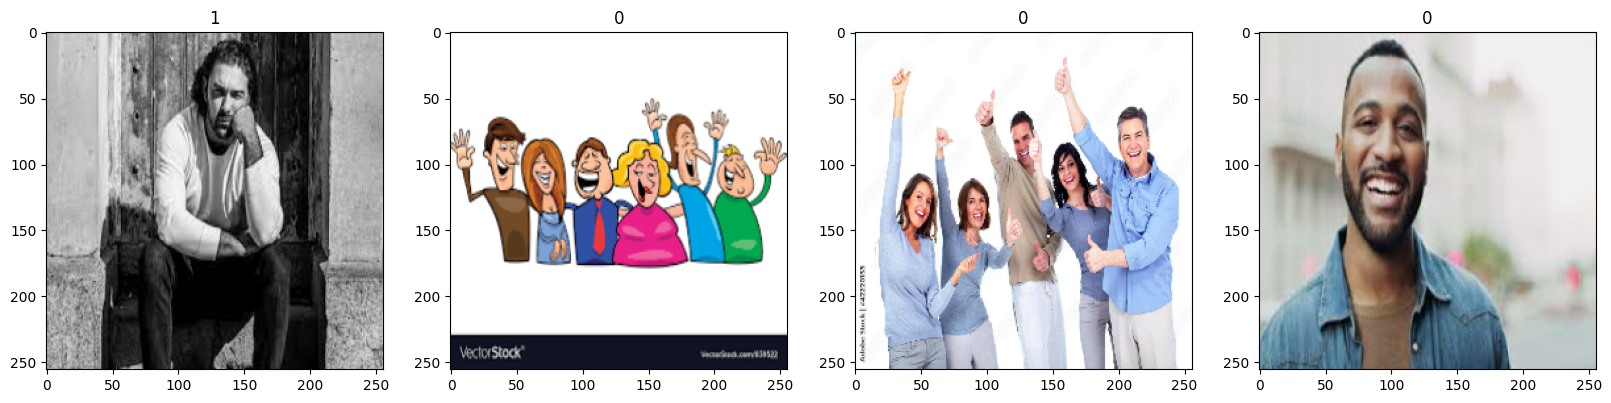

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))#using matploblib subplot function to plot images
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [20]:
#preprocessing the data means image range is 0-250 and we are doing 0-1  just for making the process faster
data = data.map(lambda x,y: (x/260, y))#here data is the pipeline and we are scaling as we load data
#x is the image(features) y is the label

In [62]:
batch[0].max()

0.9807692

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.26109526, 0.3495568 , 0.0350586 ],
          [0.25503305, 0.34216496, 0.04378005],
          [0.24113582, 0.32353514, 0.0560622 ],
          ...,
          [0.9061899 , 0.94021934, 0.71003604],
          [0.885945  , 0.9269231 , 0.67972505],
          [0.88461536, 0.9269231 , 0.66627103]],
 
         [[0.25960645, 0.348068  , 0.03693519],
          [0.25503305, 0.34216496, 0.04598201],
          [0.24113582, 0.32353514, 0.0560622 ],
          ...,
          [0.9085858 , 0.9426152 , 0.71437097],
          [0.8904114 , 0.93028843, 0.6863934 ],
          [0.88817465, 0.93028843, 0.6731957 ]],
 
         [[0.25745192, 0.34588575, 0.03958834],
          [0.25479266, 0.3417673 , 0.04897038],
          [0.24103394, 0.32343328, 0.0560622 ],
          ...,
          [0.9122122 , 0.94610316, 0.7208693 ],
          [0.8969581 , 0.9354196 , 0.6961689 ],
          [0.89368474, 0.93533653, 0.68351346]],
 
         ...,
 
         [[0.5534128 , 0.67721087, 0.43466282],
          [0.54115

In [24]:
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max()

0.9807692

# 5. Split Data

In [26]:
len(data)#ten batches

10

In [27]:
train_size = int(len(data)*.7)#70% 
val_size = int(len(data)*.2)#evaluating our model while training
test_size = int(len(data)*.1)

In [28]:
#train_size
#val_size
#test_size
train_size+val_size+test_size

10

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [30]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 1s/step - loss: 0.7431 - accuracy: 0.5312 - val_loss: 0.5746 - val_accuracy: 0.8125
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.5879 - accuracy: 0.6920 - val_loss: 0.5271 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.4940 - accuracy: 0.7812 - val_loss: 0.3544 - val_accuracy: 0.9375
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.4094 - accuracy: 0.8705 - val_loss: 0.3291 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.3451 - accuracy: 0.8750 - val_loss: 0.2306 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3192 - accuracy: 0.8795 - val_loss: 0.3084 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2339 - accuracy: 0.9107 - val_loss: 0.1996 - val_accuracy: 0.9062
Epoch 8/20
7/7 [========================

# 8. Plot Performance

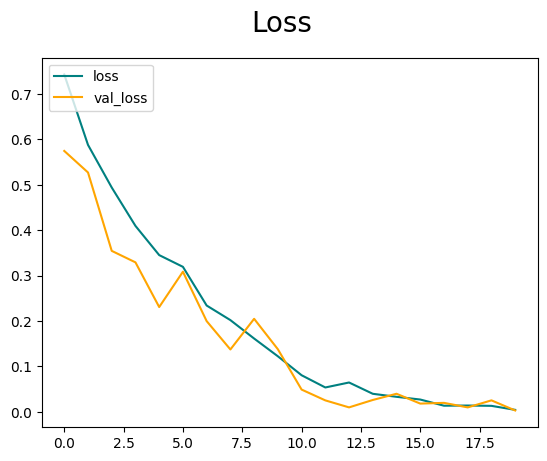

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

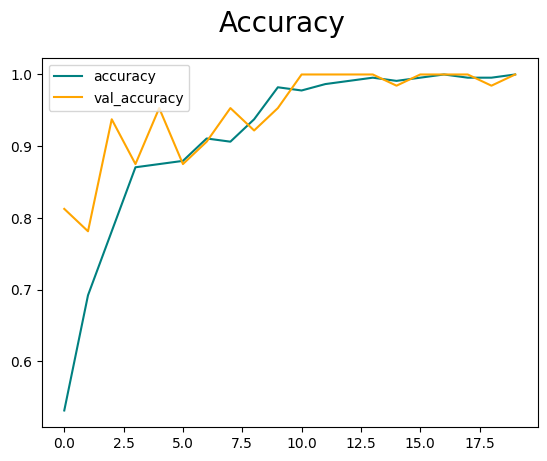

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 5s 5s/step


In [51]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [52]:
import cv2

colour is wierd as open cv reads in as bgr and matlotlib as rgb
plt.imshow(cv2.cvtColor(img,cv2.Color_BGR2RGb)

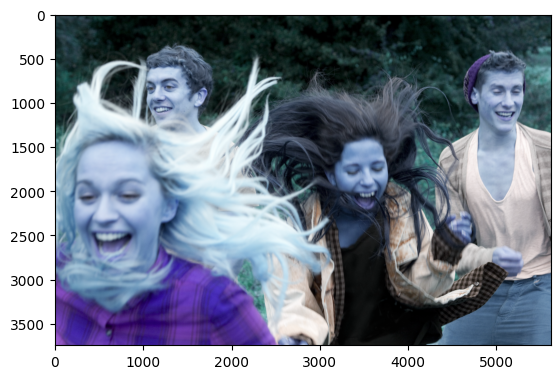

In [53]:
img = cv2.imread('154006829.jpg')
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGb))
plt.imshow(img)
plt.show()

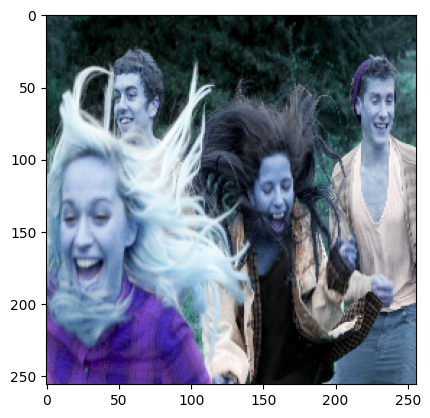

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 52ms/step


In [56]:
yhat

array([[0.16117363]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','imageclassifier.h5'))

In [60]:
new_model = load_model('imageclassifier.h5')

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 148ms/step


array([[0.09619019]], dtype=float32)